<H1> Mast</H1> <br> 
Deterine mast diameter as function of height and load based on a hollow tube. <br> 
<hr> 
<H2>Modification history </H2><br> 
25-May-24   CBL Original <br> 
<hr> 
<H2> References </H2> 
<ul>
    <li> <a href="https://en.m.wikipedia.org/wiki/Section_modulus"> Section Modulus </a> </li>
    <li> <a href="https://www.physicsforums.com/threads/calculate-deflection-for-aluminium-tube-beam-inertia-mass-d.1009958/"> deflection </a</li>
    <li> <a href="http://nguyen.hong.hai.free.fr/EBOOKS/SCIENCE%20AND%20ENGINEERING/MECANIQUE/THEORIE%20DE%20BASE/Roark's%20Formulas%20For%20Stress%20And%20Strain.pdf"> Stress and Strain </a></li>
    <li> <a href="https://www.engineersedge.com/calculators/section_square_case_12.htm" > TUBE Equations </li>
    <li> <a href="https://www.youtube.com/watch?v=MvBqCeZllpQ"> Video</a></li>
    <li> <a href="https://www.ilearnengineering.com/civil/what-is-a-cantilever-beam-and-how-can-we-calculate-its-deflection" > Cantilever beam</a></li>
    <li> <a href="https://www.britannica.com/science/catenary"> Catenary Equation </a></li>
</ul>
<hr> 
<H2> Equations </H2>
<H3> Hollow tube deflection </H3>
$ Deflection = {{WL^3}\over{4EI}}$ <br> 
Where: <br> 
<ul>
    <li> W = Load</li>
    <li> L = length </li>
    <li> E = Young's modulus</li>
    <li> I = Moment of inertia </li>
</ul>
<H3> Mass Moment of Inertia </H3>
Not to be confused with the Area Moment. <br> 
$ I = {M\over 2} ({R_1}^2 + {R_2}^2) $ <br> 
Where: <br> 
<ul>
    <li> M = mass</li>
    <li> $R_1$ = bore radius</li>
    <li> $R_2$ = Tube radius </li>
</ul>

In [1]:
# includes
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as const
#
# Constants used in the equations below. 
rho_Al = 2.7        # density of aluminum value in g/cm^3 
E_Al   = 68.9e9     # Youngs modulus of Alumimum in Pa  - Pascal is in N/m^2
rho_Fe = 7.85       # density of common steel value in g/cm^3 
E_Fe   = 200e9      # Youngs modulus of Steel in Pa  - Pascal is in N/m^2
rho_Cu = 8.96       # density of copper in g/cm^3
rho_cgs_to_MKS = 1.0e-3 * 1.0e6 # convert to kg/m^3

In [2]:
def AreaMoment(OD, ID):
    """
    @param OD - outer diameter of pipe 
    @param ID - inner diameter of pipe 
    Returns Area moment of inertia section properties. in units^4 
    TESTED: 31-May-24
    """
    rv = np.pi * (np.power(OD,4) - np.power(ID,4))/64
    return rv

In [3]:
def SectionModulus(OD, ID):
    """
    @param OD - outer diameter of pipe
    @param ID - inner diameter of pipe
    Returns Section modulus in units^3
    TESTED: 31-May-24
    """
    rv = np.pi * (np.power(OD,4) - np.power(ID,4))/(32*OD)
    return rv

In [4]:
def RadiusOfGyration(OD, ID):
    """
    @param OD - outer diameter of pipe
    @param ID - inner diameter of pipe
    Returns Radius of gyration in units
    TESTED: 31-May-24
    """
    rv = np.sqrt(np.power(OD,2) + np.power(ID,2))/4
    return rv

In [5]:
def TArea(OD, ID):
    """
    @param OD - outer diameter of pipe
    @param ID - inner diameter of pipe
    Returns Area in units^2
    TESTED: 31-May-24
    """
    rv = np.pi*(np.power(OD,2) - np.power(ID,2))/4
    return rv

In [6]:
def Inertia(Mass, R1, R2):
    """
    Return the moment of inertia of a hollow tube.  Return value is kg m^2
    @param Mass - mass of tube (kg)
    @param R1 - Inner radius (m)
    @param R2 - Outer radius (m) 
    Returns Inertia in kg m^2
    """
    I = 0.5*Mass*(np.power(R1,2)+np.power(R2,2))
    return I

Equation for deflection of a Force at a given point X along the beam.<br> 
<a href = https://www.ilearnengineering.com/civil/what-is-a-cantilever-beam-and-how-can-we-calculate-its-deflection" > Deflection </a> 
<br> 
$ y = {{P X^2}\over{6 E I}} (3L - X) $ <br> 

In [7]:
def Deflection2(X, Force, Length, Youngs, OD, ID):
    """
    @param X - distance from the fixed point on the beam 
    @param Force in Newtons at the point X. 
    @param Length of the tube in meters
    @param Youngs modulus in Pa
    @param OD - outer diameter in meters
    @param ID - inner diameter in meters
    Returns the defelection in meters for the force (Force) applied at X. 
    """
    I = AreaMoment(OD, ID)
    print("Area Moment: ", I, " Meters^4")
    ir = Force*np.power(X,2)/(6*Youngs*I)
    rv = ir * (3*Length-X)
    return rv

In [8]:
def Deflection(X, Force, Length, Youngs, OD, ID):
    """
    Return the deflection in m at the top of the mast given: 
    @param X - distance along beam of length L. 
    @param Force in Newtons at X
    @param Length in meters of mast
    @param Youngs - Youngs modulus in GPa 
    @return deflection in m assuming one end is fixed and the other free. 
    This was based on a youtube video and isn't quite right. 
    """
    I = AreaMoment(OD, ID)
    print("Area moment: ", np.power(X,3))
    Deflection = Force/(6*Youngs*I) * (-1.0*np.power(X,3.0) + 3*np.power(Length,2)*X - 2*np.power(Length,3)) 
    return Deflection

In [25]:
def MassofWire(Length, OD):
    """
    Determine the overall force due to gravity due to a copper wire of length L
    @param Length - in meters
    @param OD     - outer diameter in meters
    """
    return rho_Cu * rho_cgs_to_MKS * np.pi * np.power(OD/2,2) * Length

Catenary equation <br> 
<a href = "https://www.britannica.com/science/length-of-a-curve"> Catenary </a> <br> 
<a href = "https://math.stackexchange.com/questions/3502513/when-a-cable-is-suspended-from-two-points-it-hangs-in-the-form-of-a-catenary-t" Between two points. </a> <br> 
$y = ({a\over2})(e^{x\over a} + e^{-x\over a})$  or <br> 
$y = a \times cosh({x\over a})$ <br> 
where <br> 
a is the lowest height <br> 
x = 0 gives y = a <br> 

In [26]:
def CatenarySag(x, a):
    """
    Calculate the catenary sag of a wire in the absence of wind, gravity field only. 
    @param x distance from lowest point
    @param a lowest point 
    """
    return a * (np.cosh(x/a)-1)
    

In [27]:
def CatenaryLength(x,a):
    """
    Calculate the catenary length of a wire in the absence of wind, gravity field only. 
    @param x distance from lowest point
    @param a lowest point 
    """
    return 2*a * np.sinh(x/a)
  

In [12]:
#
# Section Modulus aluminum
# Getting data from online metals: https://www.onlinemetals.com/en/buy/aluminum-round-tube-6061
OD = 1.0 *0.0254        # m
Wall   = 0.125 *0.0254     # m
ID = OD - Wall
print("OD: ", OD, " ID: ", ID)
MArea = AreaMoment(OD, ID)
print("Area Moment: ", MArea)
SM = SectionModulus(OD, ID)
print("Section Modulus: ", SM)
RG = RadiusOfGyration(OD,ID)
print("Radius of gyration: ", RG)
A = TArea(OD, ID)
print("Area: ", A)

OD:  0.0254  ID:  0.022224999999999998
Area Moment:  8.455017673929566e-09
Section Modulus:  6.657494231440604e-07
Radius of gyration:  0.008437678238858128
Area:  0.00011875956541347607


Tube parameters, Length:  10.0  OD:  0.07619999999999999  ID:  0.07302499999999999  meters
XS:  9.302832624055611e-05  m^2
Area Moment:  2.5906273917140493e-07  Meters^4


Text(0.5, 1.0, 'Tube of diameter: 0.07619999999999999 and wall thickness: 0.003175')

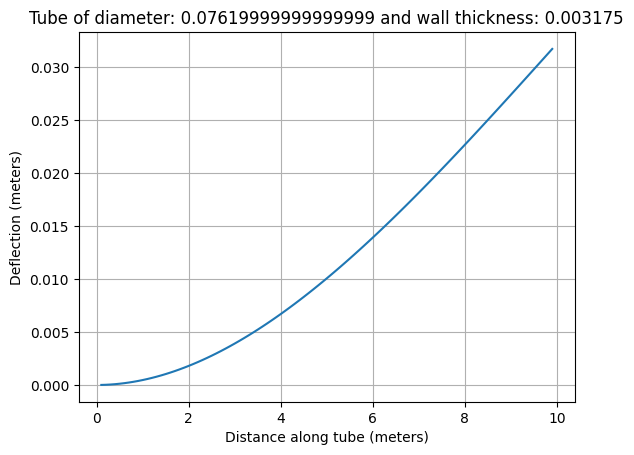

In [28]:
#
# test for T6061 aluminum
# Getting data from online metals: https://www.onlinemetals.com/en/buy/aluminum-round-tube-6061
OD      = 3.0 * 0.0254        # inches converted to meters
Wall    = 0.125 * 0.0254
ID      = OD - Wall
Length  = 10.0       # meters
print("Tube parameters, Length: ", Length, " OD: ", OD, " ID: ", ID, " meters")
Density = 2.7        # value in g/cm^3 
Density = Density * 1.0e-3 * 1.0e6 # convert to kg/m^3
Youngs  = E_Fe    # Pa  - Pascal is in N/m^2 Aluminum
CrossSection = TArea(OD/2, ID/2)
print ("XS: ", CrossSection, " m^2")
Force   = 5    # Newtons
X = np.arange(0.1, Length, 0.1)
#X = Length # distance from fixed point. 
Def     = Deflection2(X, Force, Length, Youngs, OD, ID)
#print("Deflection: ", Def, " Meters")
plt.plot(X, Def)
plt.grid()
plt.xlabel('Distance along tube (meters)')
plt.ylabel('Deflection (meters)')
title = 'Tube of diameter: ' + str(OD) + ' and wall thickness: ' + str(Wall)
plt.title(title)

Now that this appears to be working, if we want any altitude we will have to step the
tubes. The question is: for a specific load, height and maximum deflection
how do we step. Lets makes some assumptions. Since I expect this to hang an antenna or a flag what is the expected load. 

In [14]:
Wire_Length = 60.0 * 12.0 * 0.0254 # wire length 60 feet to meters
Wire_OD     = 0.00205    # AWG 12 in M
Weight = MassofWire(Wire_Length, Wire_OD)
print("Mass due to wire. ", Weight, " kg")

Mass due to wire.  0.5408437634908958  kg


Wire Mass:  136.9418441629659  and force:  1342.9407360607495
maximum wire length. 3668.837222015073


Text(0.5, 1.0, 'Catenary between two poles.')

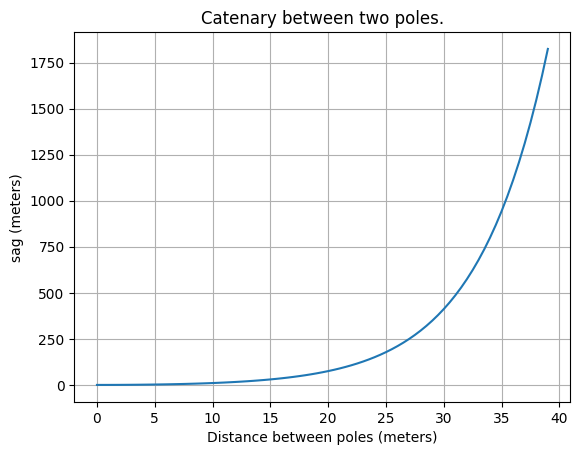

In [35]:
# apparently the catenary does not depend on mass. 
StartingHeight = 30.0 * 12.0 * 0.0254  # highest point x = 0
EndingHeight   = 10.0 * 12.0 * 0.0254  # lowest point x = L
L = 128.0 * 12.0 * 0.0254  # distance between both points
a = StartingHeight - EndingHeight
x = np.arange(0, L, 0.5)
y = CatenarySag(x, a)
z = CatenaryLength(x, a)
wod = 0.00230578        # 12Ga wire in meters
mass = MassofWire(z[len(z)-1], wod)
print("Wire Mass: ", mass, " and force: ", mass *const.g)
MaxWireLength = CatenaryLength(L,a)
print('maximum wire length.', MaxWireLength)
plt.plot(x,y)
plt.grid()
plt.xlabel('Distance between poles (meters)')
plt.ylabel('sag (meters)')
plt.title('Catenary between two poles.')

<H1> Catenary Forces </H1>
<a href="https://www.calqlata.com/productpages/00003-help.html#:~:text=The%20two%20practical%20properties%20defining,the%20bottom%20of%20the%20loop)."> Force </a> <br> 
The angle of the catenary is given by: <br> 
$ \theta = {tan^{-1}({F_y \over F_x})} $ <br> 
$F_x$ is constant throughout the curve. <br> 
$F_y$ is based on the weight per unit length. <br>
For a chain, wire or rope connected to a pole the $F_y$ puts the pole in compression. The $F_x$ is the horizontal displacement force. 

Maxium downward force of wire. 11.310736780199132  Newtons


/tmp/ipykernel_16982/4274020968.py:6: RuntimeWarning: invalid value encountered in divide
  Fx = Fy * x/y


Text(0.5, 1.0, 'Force as a function of length')

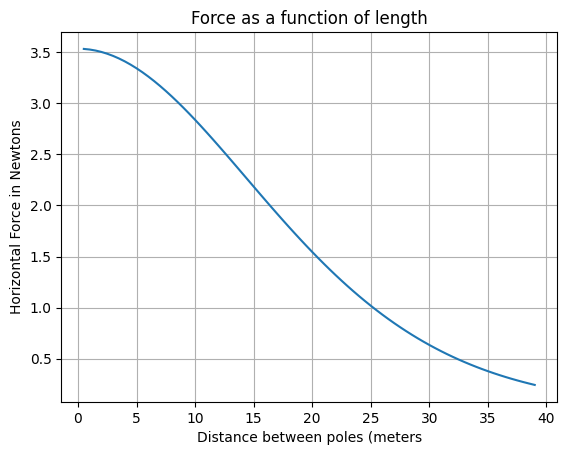

In [42]:
Wire_OD     = 0.00205    # AWG 12 in M
WeightPerUnitLength = rho_Cu * rho_cgs_to_MKS * np.pi * np.power(Wire_OD/2, 2) * const.g
Fy = x * WeightPerUnitLength
print("Maxium downward force of wire.", Fy[len(Fy)-1], " Newtons")
#theta = atan2(y,x)
Fx = Fy * x/y
plt.plot(x,Fx)
plt.grid()
plt.xlabel('Distance between poles (meters')
plt.ylabel('Horizontal Force in Newtons')
plt.title('Force as a function of length')

In [39]:
print(3.584/2.2*const.g)

15.975924363636361
